<a href="https://colab.research.google.com/github/cyamize/MNIST/blob/main/mnist_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow

In [2]:
import tensorflow as tf

In [3]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

In [4]:
#from tensorflow.keras.utils import to_categorical

In [5]:
import matplotlib.pyplot as plt

In [6]:
img_rows, img_cols = 28, 28

In [7]:
# 데이터셋 분리

(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(K.image_data_format())

11501568/11490434 [==============================] - 0s 0us/step
channels_last


In [8]:
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1) 
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

input_shape = (img_rows, img_cols, 1)

In [9]:
# type 변경 
x_train=x_train.astype('float32')
x_test = x_test.astype('float32')

In [10]:
# 정규화 

x_train/=255 
x_test/=255

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [11]:
# 범주화 (one-hot encoding)

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [12]:
# modeling (출력 0~9)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3),
                 activation='relu',
                 input_shape=input_shape))

In [13]:
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2))) # 가로/세로 절반으로 축소, 특징값만 추출

In [14]:
model.add(Dropout(0.25))
model.add(Flatten()) # 3차원 >> 1차원 
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

#출력층 (0~9)

model.add(Dense(10, activation='softmax'))


In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

In [16]:
12*12*64

9216

In [17]:
# 환경설정(model 학습)

model.compile(loss = keras.losses.categorical_crossentropy, 
              optimizer = 'adam',
              metrics=['accuracy'])

In [18]:
# 학습
history= model.fit(x_train, y_train, 
          batch_size = 128,
          epochs = 12, 
          verbose=1,
          validation_data=(x_test, y_test))

Epoch 1/12
469/469 [==============================] - 47s 9ms/step - loss: 0.4716 - accuracy: 0.8507 - val_loss: 0.0517 - val_accuracy: 0.9834
Epoch 2/12
469/469 [==============================] - 4s 8ms/step - loss: 0.0861 - accuracy: 0.9736 - val_loss: 0.0369 - val_accuracy: 0.9883
Epoch 3/12
469/469 [==============================] - 4s 8ms/step - loss: 0.0590 - accuracy: 0.9815 - val_loss: 0.0309 - val_accuracy: 0.9900
Epoch 4/12
469/469 [==============================] - 4s 8ms/step - loss: 0.0473 - accuracy: 0.9854 - val_loss: 0.0280 - val_accuracy: 0.9912
Epoch 5/12
469/469 [==============================] - 4s 8ms/step - loss: 0.0417 - accuracy: 0.9866 - val_loss: 0.0307 - val_accuracy: 0.9906
Epoch 6/12
469/469 [==============================] - 4s 8ms/step - loss: 0.0366 - accuracy: 0.9886 - val_loss: 0.0336 - val_accuracy: 0.9906
Epoch 7/12
469/469 [==============================] - 4s 8ms/step - loss: 0.0325 - accuracy: 0.9897 - val_loss: 0.0280 - val_accuracy: 0.9914
Epoch

In [20]:
score = model.evaluate(x_test, y_test, verbose=0)

In [21]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.029935158789157867
Test accuracy: 0.9915000200271606


In [22]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


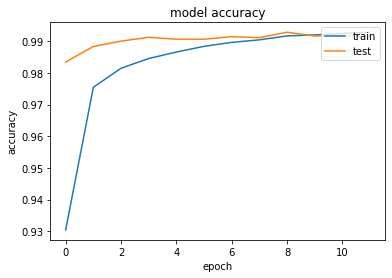

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

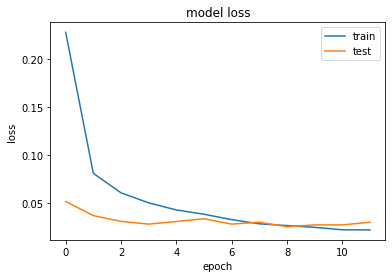

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [25]:
model.save('mnist_cnn.h5')
print('saved')

saved
